<p>
Do a textbook water hammer problem (from Wylie and Streeter), quoted in Vasconcelos (2007)</p>
<ul>
<li>plot results </li>
<li>check that $a/g\approx dH/dV$ </li>
</ul>

In [1]:
##do a textbook water hammer problem, plot results and check that a/g~=dH/dV
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "../indata/waterhammer.inp"
fc = "../indata/waterhammer.config"
mtype = 1
n1 = PyNetwork(fi,fc,mtype)
M = n1.M
N = n1.Ns[0]
L = n1.Ls[0]
a = n1.a[0]
T1 =n1.T
D = n1.Ds[0]
p1 = PyPipe_ps(N, D, L, M, a)
dt = T1/M


In [3]:
n1.runForwardProblem(dt)

In [4]:
q = n1.q(0)
h = n1.getHofA(0)
qhist = n1.qhist(0)

In [5]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

CFL = 0.600025
dH/dV = 122.436205
a/g = 122.448980
||dH/dV-a/g || = 0.012775


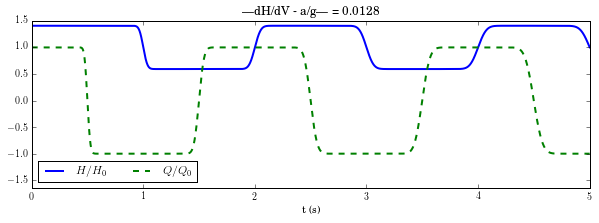

In [9]:
g = 9.8#acceleration due to gravity
T1 = n1.T
t = linspace(0,T1, M+1)
n7 = 599## point in cell where we measure H

A0 = qhist[idx_t(0,n7,0,N)]#initial cross sectional area
Q0 = qhist[idx_t(1,n7,0,N)]#initial discharge

H = n1.pressureTimeSeries(0,n7)
H0 = H[0]
Q = [qhist[idx_t(1,0,n,N)]/Q0 for n in range(M+1)]

rc('text', usetex=True)        #for tex rendering. 
rc('font', family='serif')     #for pretty font 
print "CFL = %F" %(dt/n1.Ls[0]*n1.Ns[0]*n1.cmax[0])
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
dH = max(H)-min(H)
dV = 2*Q0/A0
print "dH/dV = %f" %(dH/dV)
print "a/g = %f" %(a/9.8)
ax.plot(t,H/H0,linewidth=2)
ax.plot(t,Q,'--',lw=2)
ax.set_xlabel('t (s)')
ax.set_ylim((-1.65,1.5))
ax.legend([r'$H/H_0$',r'$Q/Q_0$'],loc = 'lower left', ncol=2)
title("|dH/dV - a/g| = %.4f" %(fabs(dH/dV-a/9.8)))
savefig("../waterhammergood.eps", format='eps')
print "||dH/dV-a/g || = %f" %abs(dH/dV-a/g) 